segmentation using OpenCV. The operations we are going to perform are listed below:
- Segmentation and contours
- Hierarchy and retrieval mode
- Approximating contours and finding their convex hull
- Conex Hull
- Matching Contour
- Identifying Shapes (circle, rectangle, triangle, square, star)
- Line detection
- Blob detection
- Filtering the blobs – counting circles and ellipses
<br/>
https://circuitdigest.com/tutorial/image-segmentation-using-opencv

1. Segmentation and contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

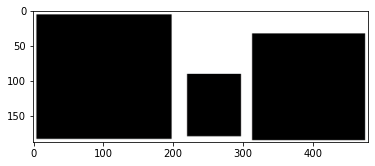

In [2]:
image= cv2.imread("images/squares.jpg")
plt.imshow(image)

Grayscale

In [3]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


Find canny edges

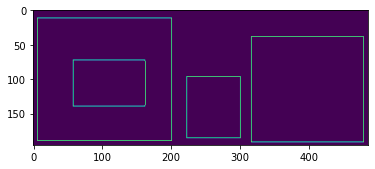

In [10]:
edged=cv2.Canny(gray,30,200)
plt.imshow(edge)

Finding contours

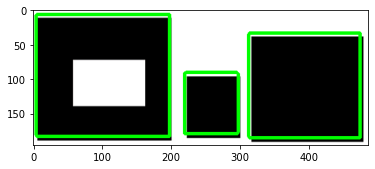

In [11]:
#use a copy of your image, e.g. - edged.copy(), since finding contours alter the image
#we have to add _, before the contours as an empty argument due to upgrade of the OpenCV version
contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
plt.imshow(image)

Printing the contour file to know what contours comprises of

In [12]:
print(contours)
print('Numbers of contours found=' + str(len(contours)))

[array([[[223,  96]],

       [[223,  97]],

       [[223,  98]],

       [[223,  99]],

       [[223, 100]],

       [[223, 101]],

       [[223, 102]],

       [[223, 103]],

       [[223, 104]],

       [[223, 105]],

       [[223, 106]],

       [[223, 107]],

       [[223, 108]],

       [[223, 109]],

       [[223, 110]],

       [[223, 111]],

       [[223, 112]],

       [[223, 113]],

       [[223, 114]],

       [[223, 115]],

       [[223, 116]],

       [[223, 117]],

       [[223, 118]],

       [[223, 119]],

       [[223, 120]],

       [[223, 121]],

       [[223, 122]],

       [[223, 123]],

       [[223, 124]],

       [[223, 125]],

       [[223, 126]],

       [[223, 127]],

       [[223, 128]],

       [[223, 129]],

       [[223, 130]],

       [[223, 131]],

       [[223, 132]],

       [[223, 133]],

       [[223, 134]],

       [[223, 135]],

       [[223, 136]],

       [[223, 137]],

       [[223, 138]],

       [[223, 139]],

       [[223, 140]],

       [[

Draw all contours

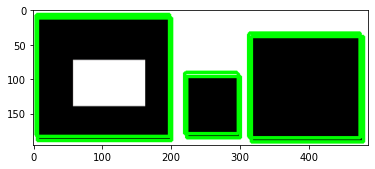

In [13]:
#use -1 as the 3rd parameter to draw all the contours
cv2.drawContours(image,contours,-1,(0,255,0),3)
plt.imshow(image)

2. Hierarchy and Retrieval Mode
<br/>
Retrieval mode defines the hierarchy in contours like sub contours, or external contour or all the contours.

Now there are four retrieval modes sorted on the hierarchy types.

- cv2.RETR_LIST – retrieves all the contours.

- cv2.RETR_EXTERNAL – retrieves external or outer contours only.

- cv2.RETR_CCOMP – retrieves all in a 2-level hierarchy.

- cv2.RETR_TREE – retrieves all in a full hierarchy.

- Hierarchy is stored in the following format [Next, Previous, First child, parent]

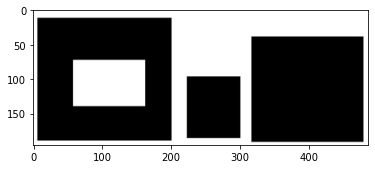

In [14]:
image=cv2.imread("images/square_donut.jpg")
plt.imshow(image)

<div style="direction: rtl;color: #4E4AE5;font-size: large;">
     فرق بین cv2.RETR_EXTERNAL که فقط کنتورهای خارجی را تلید می کند و cv2.RETR_LIST که کنتورهای داخل تصویر را هم تولید میکند 
    </div>

Numbers of contours found=3


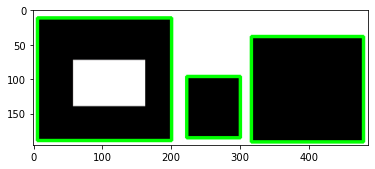

In [15]:
#Grayscale
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#Find Canny Edges
edge=cv2.Canny(gray,30,200)
#Finding Contours
contours,hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print('Numbers of contours found=' + str(len(contours)))
#Draw all contours
cv2.drawContours(image,contours,-1,(0,255,0),3)
plt.imshow(image)


Now let’s change the retrieval mode from external to list

Numbers of contours found=8


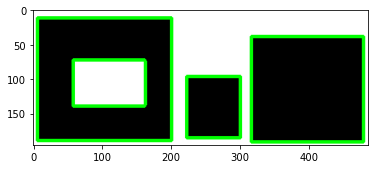

In [10]:
image1=cv2.imread("images/square_donut.jpg")
#Grayscale
gray1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
#Find Canny Edges
edge1=cv2.Canny(gray1,30,200)
#Finding Contours
contours1,hierarchy1=cv2.findContours(edge1,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print('Numbers of contours found=' + str(len(contours1)))
cv2.drawContours(image1,contours1,-1,(0,255,0),3)
plt.imshow(image1)

3. Approximating Contours and Finding their Convex hull
- in approximating contours, a contour shape is approximated over another contour shape, which may be not that much similar to the first contour shape.
<div style="direction: rtl;color: #4E4AE5;font-size: large;">
در این بخش کنتورهای محاسبه می شوند و بر اساس ان دور بخش های مختلف تصویر مستطیل کشیده می شود

    سپس در بخش بعد دور کنتور اصلی یک کنتور تقریبی رسم می شود
</div>    

In [58]:
image=cv2.imread("images/house1.jpg")
#image=cv2.imread("images/animals.jpg")
original_image=image.copy()

#Grayscale and binarize the image
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(edge,30,200)

ret, thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#Find Contours
contours, hierarchy=cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print('Numbers of contours found=' + str(len(contours)))

Numbers of contours found=6


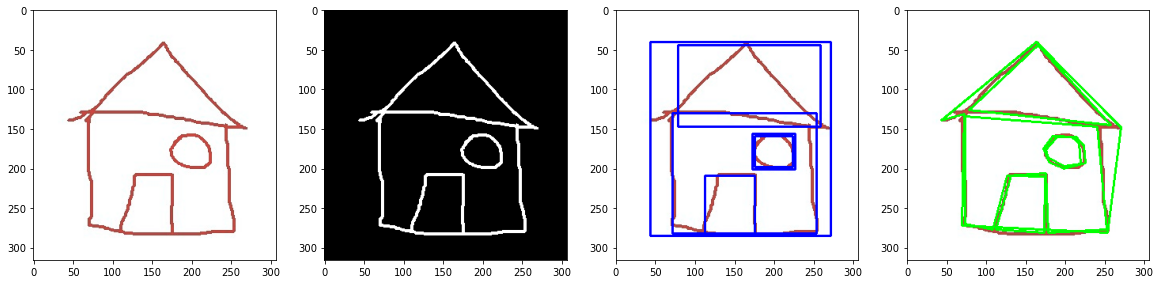

In [59]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(image)
plt.subplot(1,4,2)
plt.imshow(thresh, cmap="gray")

plt.subplot(1,4,3)
for c in contours:
    x,y,w,h=cv2.boundingRect(c)
    #print("contor is",c)
    #print("x,y,w,h is",x,y,w,h)
    #print("---------------------------------------")
    cv2.rectangle(original_image,(x,y),(x+w,y+h),(0,0,255),2)
    plt.imshow(original_image)
plt.subplot(1,4,4) 
for c in contours: 
    #calculate accuracy as a percent of contour perimeter
    accuracy=0.03*cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,accuracy,True)
    cv2.drawContours(image,[approx],0,(0,255,0),2)
    plt.imshow(image)
    cv2.imshow('Approx polyDP', image)

4. Convex Hull
- Convex hull is basically the outer edges, represented by drawing lines over a given figure.

It could be the smallest polygon that can fit around the object itsel

Numbers of contours found=2


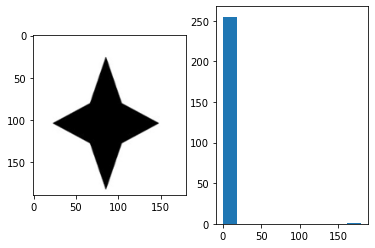

In [57]:
image=cv2.imread("images/star.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray',vmin=0,vmax=255)
hist=cv2.calcHist(gray,[0],None,[256],[0,256])
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray',vmin=0,vmax=255)
plt.subplot(1,2,2)
plt.hist(hist)

ret, thresh=cv2.threshold(gray,176,255,0)
contours, hierarchy=cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print('Numbers of contours found=' + str(len(contours)))

In [58]:
#Sort the contours by area and then remove the largest frame contour
n=len(contours)-1
contours=sorted(contours,key=cv2.contourArea,reverse=False)[:n]

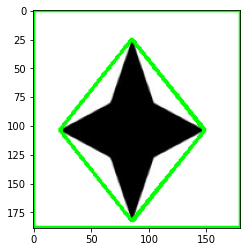

In [156]:
#Iterate through the contours and draw convex hull
for c in contours:
    hull=cv2.convexHull(c)
    cv2.drawContours(image,[hull],0,(0,255,0),2)
    plt.imshow(image)

5. Matching Contour by shapes

cv2.matchShapes(contour template, contour method, method parameter)
- Output – match value(lower value means a closer match)

- contour template – This is our reference contour that we are trying to find in a new image.

- contour – The individual contour we are checking against.

- Method – Type of contour matching (1,2,3).

- method parameter – leave alone as 0.0 (not utilized in python opencv)

<div style="direction: rtl;color: #4E4AE5;font-size: large;">
    یک کونتور نمونه میگیرد و در یک مجموعه شکل نزدیک ترین تصویر به کنتور نمونه را شناسایی می کند
    </div>

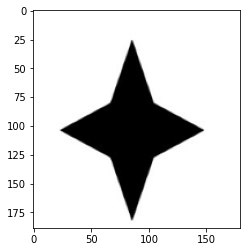

In [93]:
template= cv2.imread('images/star.jpg')
template=cv2.cvtColor(template,cv2.COLOR_RGB2GRAY)
plt.imshow(template,cmap="gray")

In [94]:
#Threshold  the images first before using cv2.findContours
ret,thresh1=cv2.threshold(template,127,255,0)

#Find contours in template
contours,hierarhy=cv2.findContours(thresh1,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
print('Numbers of contours found=' + str(len(contours)))
#we need to sort the contours by area so we can remove the largest contour which is
sorted_contours=sorted(contours, key=cv2.contourArea, reverse=True)
#we extract the second largest contour which will be our template contour
tempelate_contour=sorted_contours[1]


Numbers of contours found=2


In [95]:
#Load the target image with the shapes we are trying to match
target=cv2.imread('images/shapestomatch.jpg')
gray=cv2.cvtColor(target,cv2.COLOR_RGB2GRAY)
ret,thresh2=cv2.threshold(gray,127,255,0)   
contours,hierarhy=cv2.findContours(thresh2,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)

Numbers of contours found=4
match 0.8210133335837843
match 0.21728605302053644
match 0.03116876976538291
match 0.23380488064517113
398


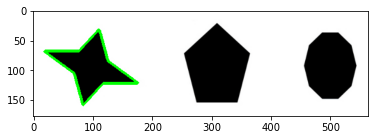

In [97]:

print('Numbers of contours found=' + str(len(contours)))
closest_contour=[]
for c in contours:
    #iterate through each contour in the target image and use cv2.matchShape to compare the contour shape
    match=cv2.matchShapes(tempelate_contour,c,1,0.0)
    print("match",match)
    #if match value is less than 0.04
    if match< 0.04:
        closest_contour=c
          
print(len(closest_contour))
cv2.drawContours(target,closest_contour,-1,(0,255,0),3)
plt.imshow(target)


8. Blob detection
<br/>
Blobs can be described as a group of connected pixels that all share a common property. The method to use OpenCV blob detector is described through this flow chart
<div style="direction: rtl;color: #4E4AE5;font-size: large;">
  لکه ها را می توان به عنوان یک گروه از پیکسل های متصل توصیف کرد که همه دارای یک ویژگی مشترک هستند.  
</div>


For drawing the key points we use cv2.drawKeypoints which takes the following arguments
<br/>
cv2.drawKeypoints(input image,keypoints,blank_output_array,color,flags)
<br/>
- where in the flags could be

- cv2.DRAW_MATCHES_FLAGS_DEFAULT

- cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS

- cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG

- cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

- and blank here is pretty much nothing but one by one matrix of zeros

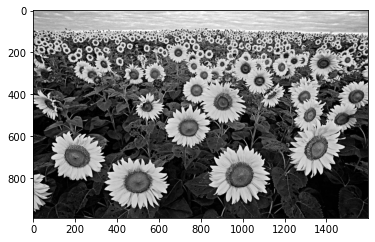

In [120]:
#image=cv2.imread('images/sunflower.jpg',cv2.IMREAD_GRAYSCALE)
image=cv2.imread('images/sunflower1.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

<div style="direction: rtl;color: #4E4AE5;font-size: large;">
  Set up detector with default parameters
</br>
آشکار ساز را با پارامترهای دیفالت ایجاد می کنیم  
    </div>


In [121]:
detector=cv2.SimpleBlobDetector_create()

Detect blobs

In [122]:
keypoints= detector.detect(image)

Draw detected blobs as red circles

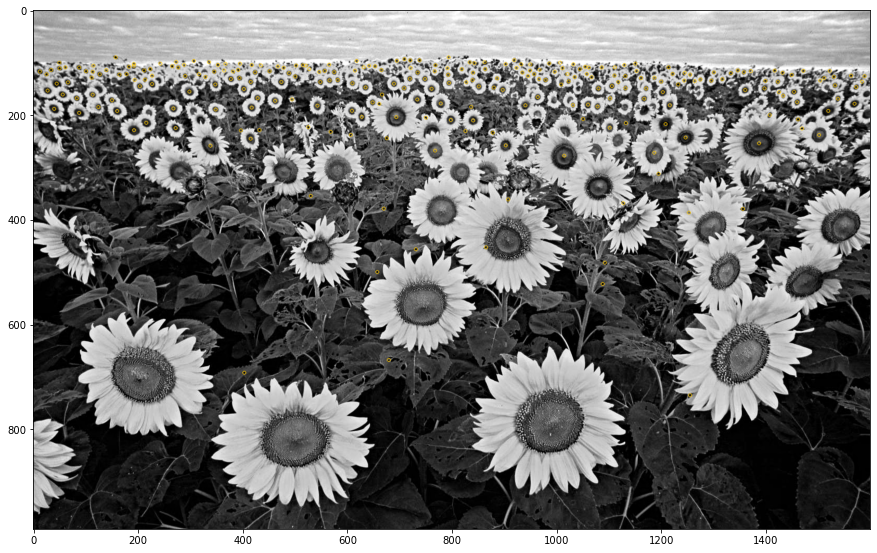

In [123]:
#cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensure the
#size of circle corresponds to the size of blob
plt.figure(figsize=(15,10))
blank=np.zeros((2,2))
blobs=cv2.drawKeypoints(image,keypoints,blank,(255,200,0),cv2.DRAW_MATCHES_FLAGS_DEFAULT)
plt.imshow(blobs)

9. Filtering the Blobs – Counting Circles and Ellipses
- We can use parameters for filtering the blobs according to their shape, size and color

- #Area
- params.filterByArea=True/False
- params.minArea=pixels
- params.maxArea=pixels
- #Circularity
- params.filterByCircularity=True/False
- params.minCircularity=  1 being perfect, 0 being opposite
- #Convexity  - Area of blob/area of convex hull
- params.filterByConvexity= True/False
- params.minConvexity=Area
- Inertia 
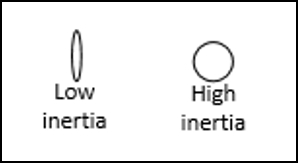

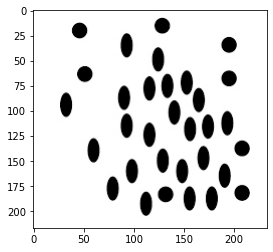

In [102]:
image=cv2.imread("images/blobs.jpg")
plt.imshow(image)

total no of blobs32


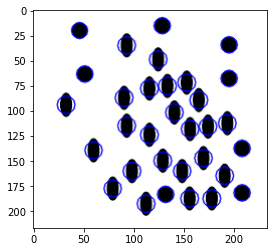

In [107]:
#Initialize the detector using default parameters
detector=cv2.SimpleBlobDetector_create()
#Detect blobs
keypoints=detector.detect(image)
#Draw blobs on our image as red circles
blank=np.zeros((1,1))
blobs=cv2.drawKeypoints(image,keypoints,blank,(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs=len(keypoints)

print("total no of blobs"+str(len(keypoints)))
cv2.putText(blobs,text,(20,550),cv2.FONT_HERSHEY_SIMPLEX,1,(100,0,255),2)

plt.imshow(blobs)

Set our filtering parameters

In [104]:
image=cv2.imread("images/blobs.jpg")
params=cv2.SimpleBlobDetector_Params()
params.filterByArea=True
params.minArea=100
#Set circularity filtering parameters
params.filterByCircularity=True
params.minCircularity=0.9
#Set convexity filtering parameter
params.filterByConvexity=False
params.minConvexity=0.2
#Set inertia filtering parameter
params.filterByInertia=True
params.minInertiaRatio=0.01

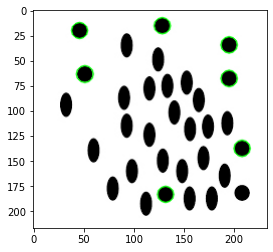

In [105]:
detector=cv2.SimpleBlobDetector_create(params)
keypoints=detector.detect(image)
blank=np.zeros((1,1))
blobs=cv2.drawKeypoints(image,keypoints,blank,(0,255,0),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
number_of_blobs=len(keypoints)
text="total no of circular blobs"+str(len(keypoints))
cv2.putText(blobs,text,(20,550),cv2.FONT_HERSHEY_SIMPLEX,1,(0,100,255),2)
plt.imshow(blobs)